In [38]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix with ED Disposition is set to Discharged')

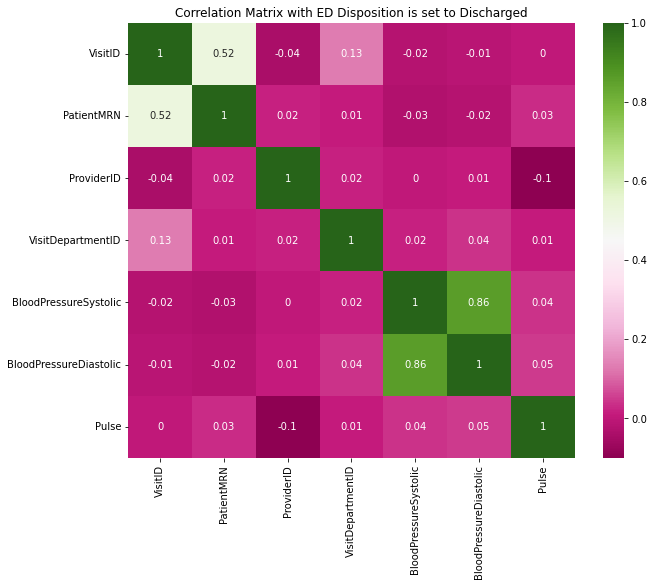

In [24]:
# Create a correlation map on Ambulatory Visits Table.
df_amb = pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")

#Correlation Matrix between the columns
corr = df_amb.corr()
corr

#Plotting the map
plt.figure(figsize=(10,8))
plot=sns.heatmap(df_amb.corr().round(2),annot = True,cmap = "PiYG")

plt.title("Correlation Matrix with ED Disposition is set to Discharged")

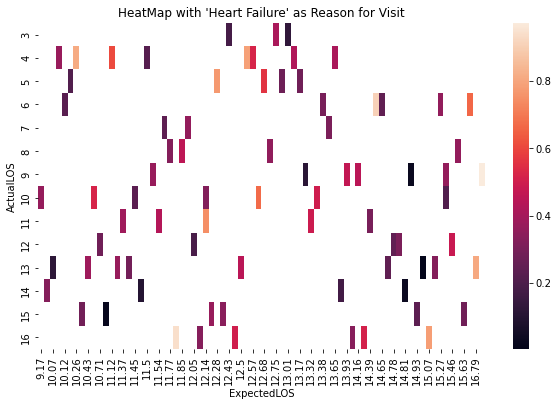

In [25]:
# Create a heat map to show the correlation between the column values of ReAdmissionRegistry.


df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")

#Calculating the actual Length of Stay in hospital by finding the difference between Discharge and Admission date.

df["ActualLOS"] = (df["DischargeDate"] - df["AdmissionDate"]).dt.days
df["ExpectedLOS"] = df["ExpectedLOS"].round(2)

#Choosing the Reason for Visit as Heart Failure
df_filt =df.loc[df.PrimaryDiagnosis == 'Heart Failure']

#plotting the heatmap
df_filt = df_filt.pivot("ActualLOS","ExpectedLOS","ExpectedMortality")
plt.figure(figsize=(10,6))
plot=sns.heatmap(df_filt)
plt.title("HeatMap with 'Heart Failure' as Reason for Visit")
plt.show()


In [29]:
#Which 'Service' has most difference in Expected LOS?
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readmregistry[["Service","ExpectedLOS"]]
df_diff= df_readm.groupby("Service")["ExpectedLOS"].apply(lambda x: x.max() - x.min()).nlargest(1).reset_index(name='Difference in LOS')
display(df_diff)     

,Service,Difference in LOS
0,ICU,14.985239


In [28]:
# List the Primary Diagnosis with their corresponding difference in Expected Mortality.
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readmregistry[["PrimaryDiagnosis","ExpectedMortality"]]
df_diff= df_readm.groupby("PrimaryDiagnosis")["ExpectedMortality"].apply(lambda x: x.max() - x.min()).reset_index(name='Exp Mortality rate difference')
display(df_diff)     

,PrimaryDiagnosis,Exp Mortality rate difference
0,AMI,0.828212
1,Afib,0.405381
2,Broken Leg,0.602421
3,Diabetes,0.698903
4,Fever,0.654424
5,Flu,0.641812
6,Heart Failure,0.969791
7,Hip Fracture,0.760645
8,Hypertension,0.693323
9,Kidney Failure,0.660022


In [30]:
#  List female patients over the age of 50 who have had their surgery cancelled in the month of February 2019.
import pandas as pd
from datetime import datetime,date

#Retrieving the age fron DOB
patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df_dob = patient["DateOfBirth"]

#Converting birth date to age
def age(DateOfBirth):
    patient["DateOfBirth"] = pd.to_datetime(df_dob)
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month,today.day) < (DateOfBirth.month,DateOfBirth.day))

patient['Age'] = df_dob.apply(age)

provider= pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
amb= pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

#Merging three tables Providers, Ambulatory Visits, Patients
df_merge = patient[["PatientID","Age","Gender"]].merge(edvisit[["EDVisitID","PatientID"]],
                                                   on = "PatientID",
                                                   how = "inner").merge(amb[["ProviderID","PatientMRN","DateofVisit","VisitStatus"]],
                                                   left_on = "PatientID",right_on = "PatientMRN",
                                                   how = "inner").merge(provider[["ProviderID","ProviderSpecialty"]],
                                                                       on = "ProviderID",
                                                                       how = "inner")

#Retreiving only the rows satisfying the filter conditions
df_pat = df_merge.loc[(df_merge["Age"] >50) & (df_merge["Gender"] == 'Female') & (df_merge["ProviderSpecialty"] == 'Surgery') &  
             (df_merge["VisitStatus"] == 'Canceled') &  (df_merge["DateofVisit"] > '2019-2-1') & 
             (df_merge["DateofVisit"] < '2019-2-28')]
df_pat

,PatientID,Age,Gender,EDVisitID,ProviderID,PatientMRN,DateofVisit,VisitStatus,ProviderSpecialty
434,641,62,Female,895,12,641,2019-02-11,Canceled,Surgery


In [39]:
#List female White patients who are No Shows for Surgery during the month of April 2019.
import pandas as pd
from datetime import datetime,date

provider= pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
amb= pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

#Merging three tables Providers, Ambulatory Visits, Patients
df_merge = patient[["PatientID","Gender","Race"]].merge(edvisit[["EDVisitID","PatientID"]],
                                                   on = "PatientID",
                                                   how = "inner").merge(amb[["ProviderID","PatientMRN","DateofVisit","VisitStatus"]],
                                                   left_on = "PatientID",right_on = "PatientMRN",
                                                   how = "inner").merge(provider[["ProviderID","ProviderSpecialty"]],
                                                                       on = "ProviderID",
                                                                       how = "inner")

#Retreiving only the rows satisfying the filter conditions
df_pat = df_merge.loc[(df_merge["Gender"] == 'Female') & (df_merge["Race"] == 'White') & (df_merge["ProviderSpecialty"] == 'Surgery') &  
             (df_merge["VisitStatus"] == 'No Show') &  (df_merge["DateofVisit"] > '2019-3-1') & 
             (df_merge["DateofVisit"] < '2019-3-30')]
df_pat

,PatientID,Gender,Race,EDVisitID,ProviderID,PatientMRN,DateofVisit,VisitStatus,ProviderSpecialty
340,34,Female,White,34,10,34,2019-03-18,No Show,Surgery
341,34,Female,White,125,10,34,2019-03-18,No Show,Surgery
366,818,Female,White,1072,10,818,2019-03-17,No Show,Surgery
367,831,Female,White,1085,10,831,2019-03-10,No Show,Surgery
374,872,Female,White,1126,10,872,2019-03-29,No Show,Surgery
381,35,Female,White,35,11,35,2019-03-19,No Show,Surgery
382,35,Female,White,126,11,35,2019-03-19,No Show,Surgery
399,819,Female,White,1073,11,819,2019-03-18,No Show,Surgery
400,832,Female,White,1086,11,832,2019-03-11,No Show,Surgery
413,36,Female,White,127,12,36,2019-03-20,No Show,Surgery


In [51]:
# Count of patients based on Discharge Disposition & Service

readm= pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readm[["DischargeDisposition","Service","PatientID"]]
patientcount = df_readm.groupby(["DischargeDisposition","Service"]).count()
display(patientcount)

PatientID
DischargeDisposition Service                    
Expired              Cardiology               15
                     General Medicine         18
                     Hospitalist              10
                     ICU                      29
                     Neurology                27
                     Orthopeadics              5
Home                 Cardiology               75
                     General Medicine        229
                     Hospitalist              88
                     ICU                     110
                     Neurology                36
                     Orthopeadics             39
Transfer             Cardiology                5
                     General Medicine         16
                     Hospitalist               3
                     ICU                      12
                     Neurology                 2
                     Orthopeadics              1

In [8]:
# Calculate the mean Expected LOS based on PrimaryDiagnosis.
readm= pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readm[["PrimaryDiagnosis","ExpectedLOS"]]
mean_value = df_readm.groupby(["PrimaryDiagnosis"])["ExpectedLOS"].mean().round().reset_index(name='Mean Expected LOS')
mean_value

,PrimaryDiagnosis,Mean Expected LOS
0,AMI,12.0
1,Afib,13.0
2,Broken Leg,5.0
3,Diabetes,7.0
4,Fever,7.0
5,Flu,6.0
6,Heart Failure,13.0
7,Hip Fracture,3.0
8,Hypertension,6.0
9,Kidney Failure,7.0


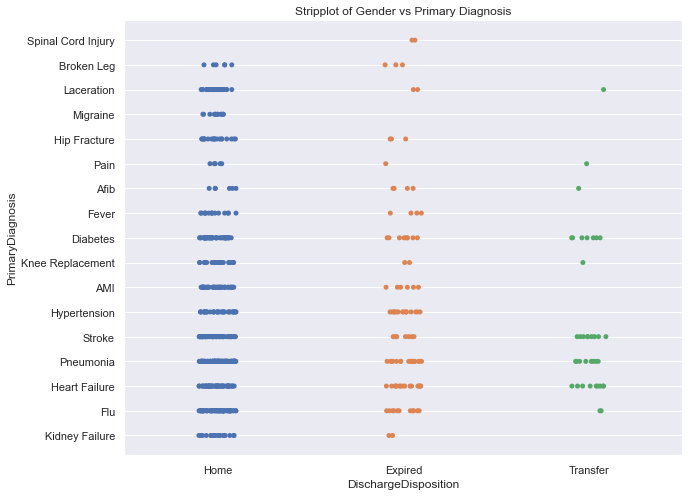

In [33]:
#Plot a stripplot showing the distribution of Primary Diagnosis vs Discharge Disposition.
# use to set style of background of plot
sns.set(style="darkgrid")
  
# loading data-set
readm= pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readm[["PrimaryDiagnosis","DischargeDisposition"]]  

plt.figure(figsize=(10,8))
ax = sns.stripplot(x='DischargeDisposition', y='PrimaryDiagnosis', data=df_readm,jitter = True,dodge = True)
  
# giving title to the plot
plt.title('Stripplot of Gender vs Primary Diagnosis')
  
# function to show plot
plt.show()

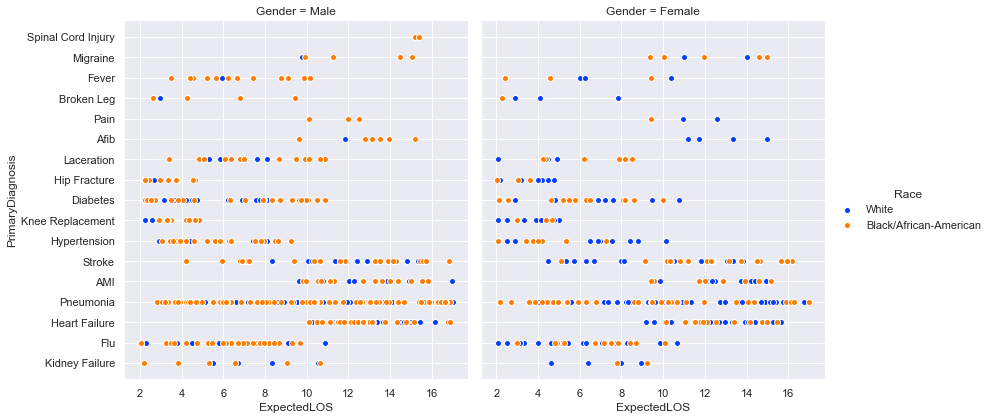

In [57]:
#Create a scatter plot showing the ExpectedLOS vs Primary Diagnosis, based on patient's gender.
import seaborn
import matplotlib.pyplot as plt

patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")

#merging two tables Patients and ReAdmissionRegistry to retrieve dat from both tables
df_merge = patient[["PatientID","Gender","Race","Language"]].merge(readmregistry[["PatientID","PrimaryDiagnosis","ExpectedLOS"]],
                                                   on = "PatientID",
                                                   how = "inner")
# Form a facetgrid using columns with a hue
graph = seaborn.FacetGrid(df_merge, col ="Gender",hue ="Race",height= 6,palette="bright")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "ExpectedLOS", "PrimaryDiagnosis", edgecolor ="w").add_legend()
# show the object
plt.show()


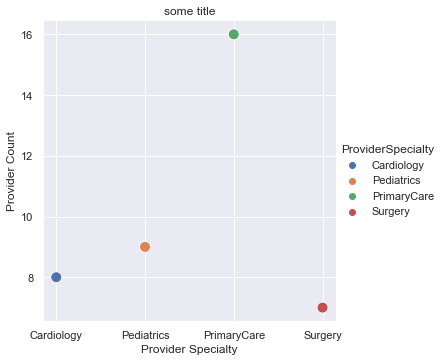

In [71]:
# Create a plot of Provider count based on Provider Speciality.
provider = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
df_prod = provider[["ProviderSpecialty","ProviderID"]]
prod=df_prod.groupby("ProviderSpecialty").count()


p=sns.relplot(x ="ProviderSpecialty", y ="ProviderID",
            hue ="ProviderSpecialty", data = prod,s=120);
p.set(xlabel ="Provider Specialty", ylabel = "Provider Count", title ='Provider count based on Provider Speciality')